In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv
from scipy import interpolate

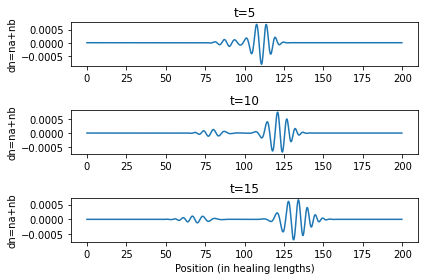

In [3]:
#plotting relative densities of the components in space and time
a=[]
b=[]
dx=0.25
x=np.arange(0,200,dx) #gridspace

n_0=0.0025

#gathering results data form results.txt and storing in variables a and b
with open('results.txt','r') as csvfile:
    plots=csv.reader(csvfile, delimiter=',')
    for row in plots:
        a.append(row[::2]) #even row elements are condensate a
        b.append(row[1::2]) #odd row elements are condensate b

a=np.array(a).astype(float)
b=np.array(b).astype(float)

Figure, (ax1, ax2, ax3)=plt.subplots(3)
ax1.plot(x,a[5]-b[5])
ax1.set_title('t=5')
ax1.set_ylabel('dn=na+nb')
#ax1.set_ylim([0, 0.006])
ax2.plot(x,a[10]-b[10])
ax2.set_title('t=10')
ax2.set_ylabel('dn=na+nb')
#ax2.set_ylim([0, 0.006])
ax3.plot(x,a[15]-b[15])
ax3.set_title('t=15')
#ax3.set_ylim([0, 0.006])
ax3.set_xlabel('Position (in healing lengths)')
ax3.set_ylabel('dn=na+nb')
Figure.tight_layout()
plt.show()

Text(0, 0.5, 'dw/dk')

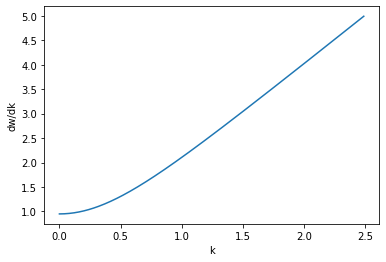

In [ ]:
#plotting dimensionless dispersion relation of spectra for density and spin modes
k=np.arange(0,2.5,0.01)
w1=[]
w2=[]
gfraction=0.1
omega=0 #in gn

for x in k:
    temp1=x*np.sqrt(np.power(x,2)+1+gfraction)
    w1.append(temp1)

for x in k:
    temp2=np.sqrt(np.power(x,2)*(np.power(x,2)+1-gfraction+4*omega)+2*omega*(1-gfraction+2*omega))
    w2.append(temp2)

tck=interpolate.splrep(k,w2)
tangent=interpolate.splev(k,tck,der=1)

#plt.plot(k, w1)
plt.plot(k, tangent)
plt.xlabel('k')
plt.ylabel('dw/dk')

2.1958646616541326


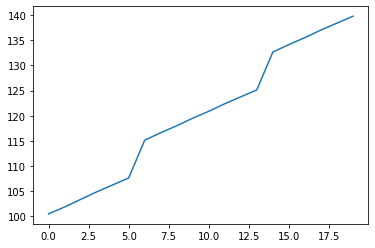

In [ ]:
#finding dw/dk to get an idea of group velocity of spin mode
#idea is to find position of relative density mode peak for each timestep
#then graph position and time and fit the line to find gorup velocity
spinmodes=np.subtract(a,b).tolist()
max_index=[]  #peak position index

for row in spinmodes:
    max_value=max(row)
    max_index.append(row.index(max_value))

max_position=[i*dx for i in max_index]

#plotting peak position in space and time
time=np.arange(0,20,1)
plt.plot(time, max_position)

#finding group velocity
m,b=np.polyfit(time, max_position,1)
print(m)
